# ECE-657A - Assignment 1

date submitted: 04/02/2022

In [1]:
#Importing the Following libraries:
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
from scipy import stats

## Q1 Assessment of Data and Applying Normalization (on Abalone Dataset only)

#### Q1.1. Load the dataset and explore the features and their ranges and distribution.
Answer: 
The csv file did not contain the column names and hence we have added the features as obtained from the data source [1].

We used abalone.info() function to get summary about our data set. Out of the 9 features there is 1 categorical data feature i.e 'Sex' while the rest are numeric features.

We used abalone.shape to obtain the data set's structure and we can see the resulting information has 9 columns (data features) and 4176 (rows) entires.

We used the function abalone[data_features].describe() to display the discriptive statistics such as mean, min, max values etc,. for the numerical features in the given data set.

In [2]:
#Columns i.e data features as seen in the abalone data set [1]
colnames = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

#loading the CSV file.
abalone = pd.read_csv("abalone.csv", names=colnames, header=None)

abalone.info()

data_features = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
#Categorical feature
s = 'Sex'

print("\nNumber of (rows, columns) in the data set:", abalone.shape)

print("\n\t\t Table 1: Descriptive Statistics of the Abalone Dataset:")
abalone[data_features].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB

Number of (rows, columns) in the data set: (4177, 9)

		 Table 1: Descriptive Statistics of the Abalone Dataset:


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In order to display categorical variable's values we used the following code from pandas user mannual [2]. And found that the feature 'Sex' has 3 non-numeric values.

In [3]:
print("unique categorical variable's values:", pd.unique(abalone[s].sort_values()))
abalone[s].describe()

unique categorical variable's values: ['F' 'I' 'M']


count     4177
unique       3
top          M
freq      1528
Name: Sex, dtype: object


#### Q1.2. Is there any missing data? Present evidence or refer to figures or to earlier tables or figures clearly.
Answer: There is no missing data as stated in the data set's source [1].

In order to check if there is missing data in the given set, we used is.na() function, which gives a table values to check for empty data, with either True (1 - if there is a missing data) value or False (0 - if there is no missing data) value. 

Since it is harder to visually check the table with 4177 entires for True missing values, we used sum() function, to add up the True values if any are present, with respect to each feature. And it is seen that there are NO MISIING VALUES in the data set.

In [4]:
missing_values = abalone.isna()
print("\t\t\t\t Table 2 : Missing Values")
missing_values

				 Table 2 : Missing Values


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [5]:
missing_values.sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


#### Q1.3. Compute the moments or summarization statistics on the data features. Comment on the diversity of data types and ranges of the features.
Answer: The descriptive statistics for the data features have been caluclated and are displayed in Table 1 under solution of Q1.1. The diversity of Data types is also discussed in Q1.1.

The data ranges for the features is obtained using the following code. And it can be seen that there is a very wide range of values. And some of the data features such as 'Whole Weight' and 'Shucked weight' have very high number of unique float values. We further look at the ranges in the following question as we address the issue of outliers.

In [6]:
abalone.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64


#### Q1.4. Do there seem to be outliers that should be watched out for? Is it possible that they are errors or just naturally occurring? How would you evaluate this?
Answer: 

The following box plots show the varying ranges of our features. From the results below we can clearly see that there are outliers in the data. And as mentioned in the box plot defination [4] the values that lie well outside the range of box plot guarded by the whiskers are outliers.

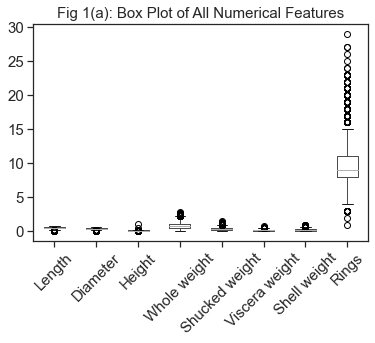

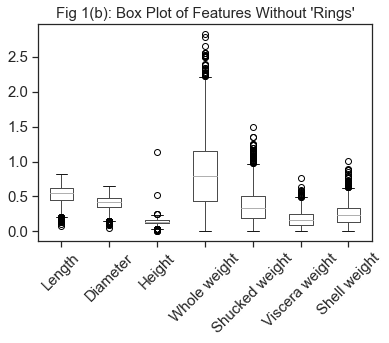

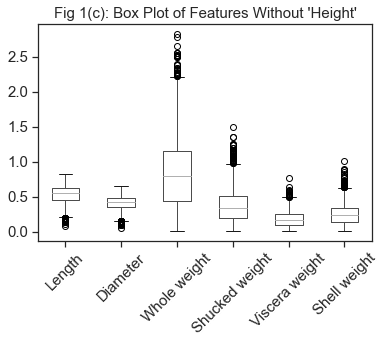

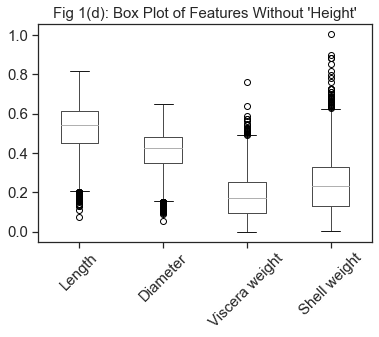

In [7]:
#box plot for numerical features 
plot = pd.plotting.boxplot(abalone, grid=False, rot=45, fontsize=15)
plot.set_title("Fig 1(a): Box Plot of All Numerical Features",fontsize=15)
plt.show()

#dropping the Rings feature to look at the ranges of other features more clearly
wo_rings = abalone.drop(columns=['Rings'])
plot = pd.plotting.boxplot(wo_rings, grid=False, rot=45, fontsize=15)
plot.set_title("Fig 1(b): Box Plot of Features Without 'Rings'",fontsize=15)
plt.show()

#dropping the Height feature to look at the ranges of other features more clearly
wo_height = wo_rings.drop(columns=['Height'])
plot = pd.plotting.boxplot(wo_height, grid=False, rot=45, fontsize=15)
plot.set_title("Fig 1(c): Box Plot of Features Without 'Height'",fontsize=15)
plt.show()

#dropping the Whole and Shucked weights to look at the ranges of other features more clearly
wo_weight = wo_height.drop(columns=['Whole weight','Shucked weight'])
plot = pd.plotting.boxplot(wo_weight, grid=False, rot=45, fontsize=15)
plot.set_title("Fig 1(d): Box Plot of Features Without 'Height'",fontsize=15)
plt.show()

Since the data feature 'Height' has only few outliers, we think that it could be a data recording error, and as shown in the descritive statistics under Q1.1, the mean value for Height is 0.139516 while maximum is 1.130000 which is about 10 times the mean value which seems un-natural.

However values in other features such as Rings and Shell weight have many values extending outside the whiskers, which could be naturally occuring.

Also, scatter plot can be used to check if there are any outliers or extreme values in the data set [3].

Text(0.5, 0.98, 'Fig 2: scatter-matrix of features')

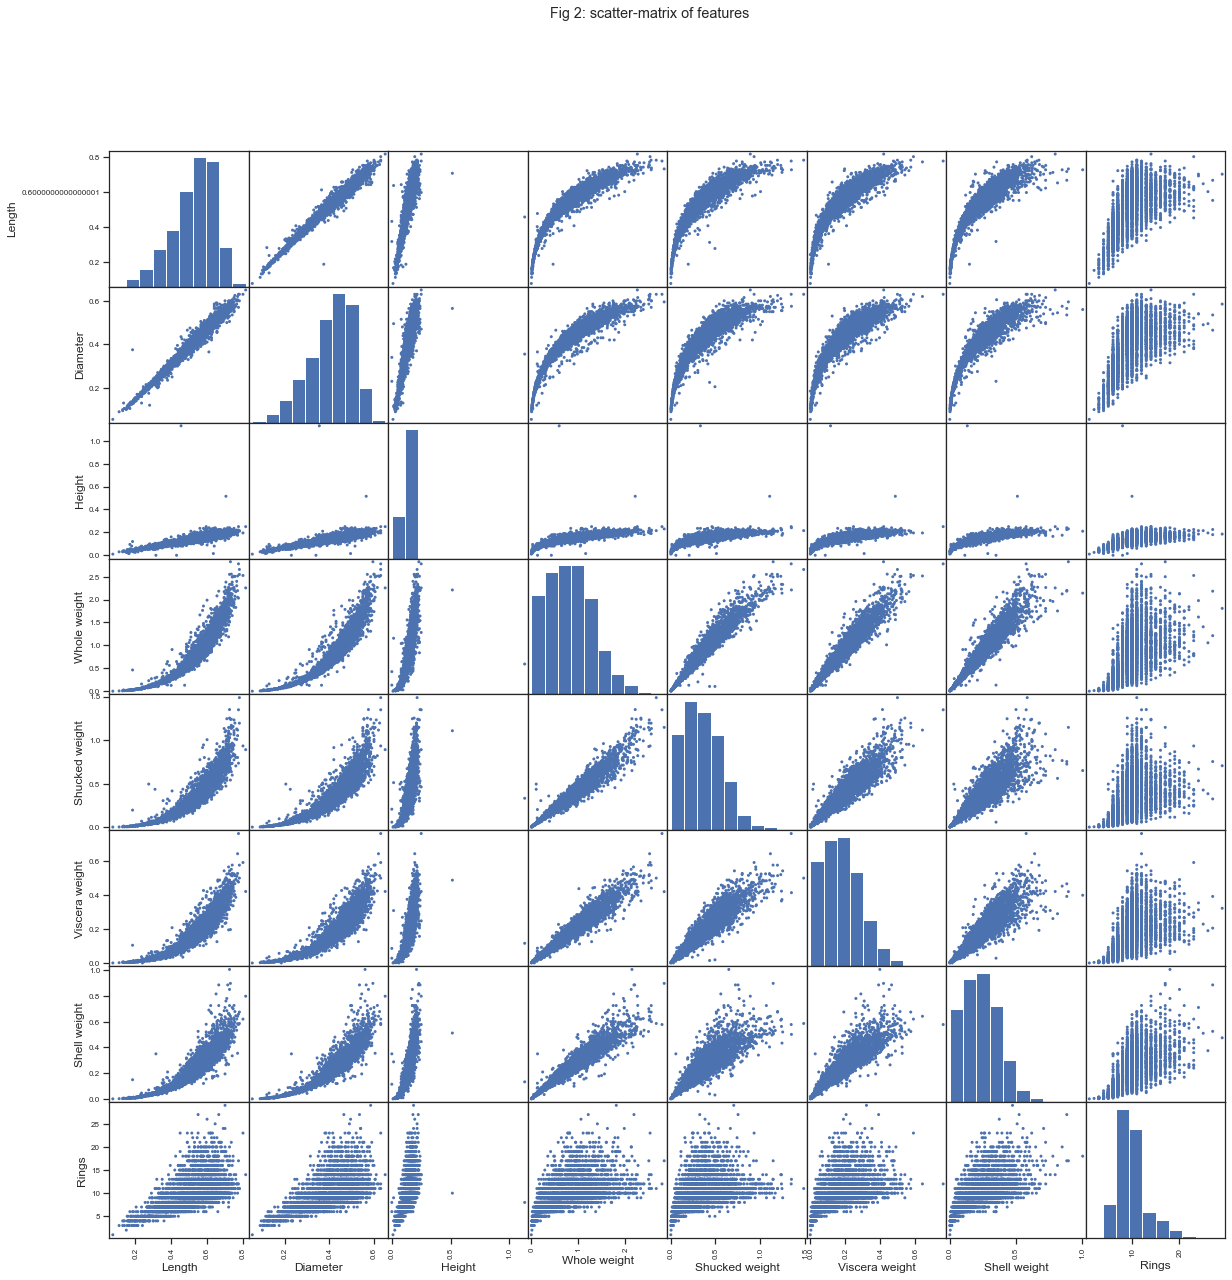

In [8]:
plot1 = pd.plotting.scatter_matrix(abalone, alpha=1, figsize=(20,20))
plt.suptitle('Fig 2: scatter-matrix of features')

Histogram plotting can be done to check if there are any outliers. As the number of bins is increased we can see the finer inconsistencies in the data. 

But, ultimately box plots give a better understanding of outliers.

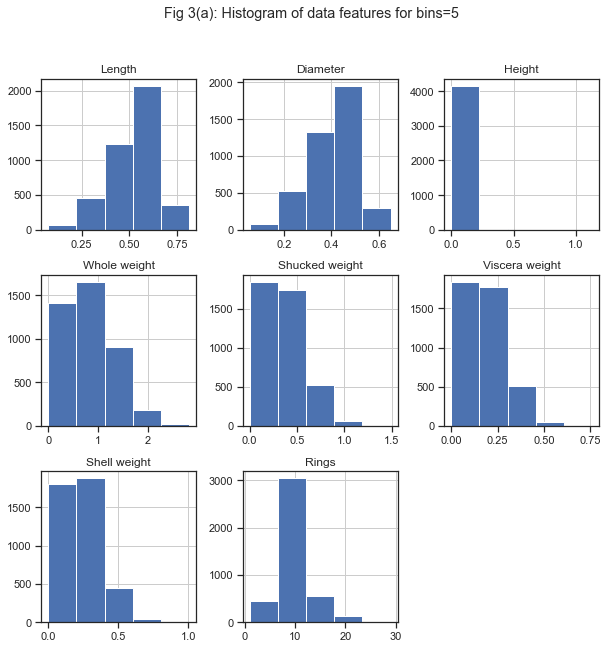

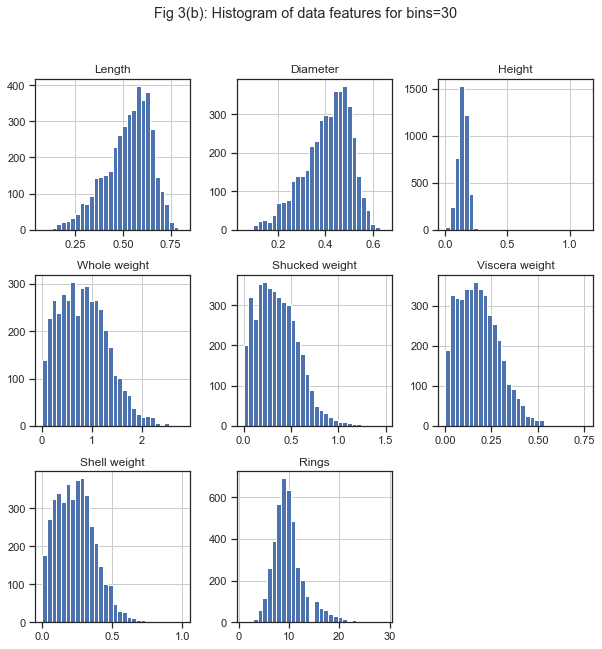

In [9]:
fig = abalone.hist(bins=5, figsize=(10,10))
plt.suptitle('Fig 3(a): Histogram of data features for bins=5')
plt.show()

fig = abalone.hist(bins=30, figsize=(10,10))
plt.suptitle('Fig 3(b): Histogram of data features for bins=30')
plt.show()


#### Q1.5. Is this a balanced dataset? If not, where is it unbalanced? Would the dataset still be usable?
Answer:

We can see that our target variable 'Rings' has a large number of unique values. And the sample distribution for each unique value is Not-Balanced, as most of the samples (row entries) have the feature 'Rings' in the range {8,9,10,11} while other unique values have low number of samples. This creates a biased view of data.

In [10]:
abalone.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [11]:
abalone['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

Text(0.5, 1.0, 'Fig 4: Bar plot of Rings')

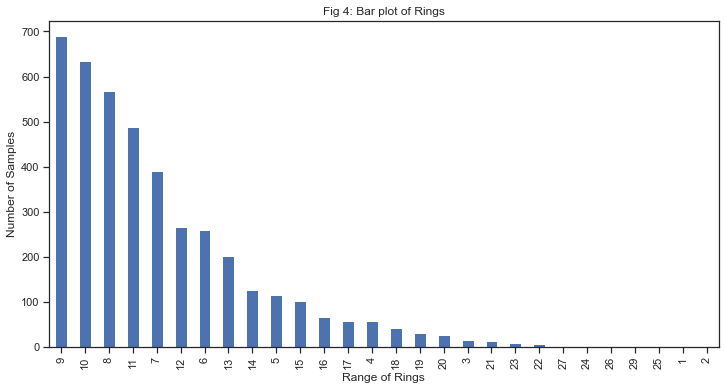

In [12]:
plt.figure(figsize = (12,6))
abalone['Rings'].value_counts().plot(kind='bar',xlabel='Range of Rings', ylabel='Number of Samples')
plt.title('Fig 4: Bar plot of Rings')

By looking at the variation of the feature of interest i.e "Rings" with respect to the nominal variable "Sex", We can see that the data is distributed similarly for different categories. 

Also it can be seen from the Histogram plot for Rings in figure 3(a) about 3000 of the samples out of total entries are covered in the range {8,9,10,11}, which means that we will be having most of the data and hence, yes the data set is still usable. 

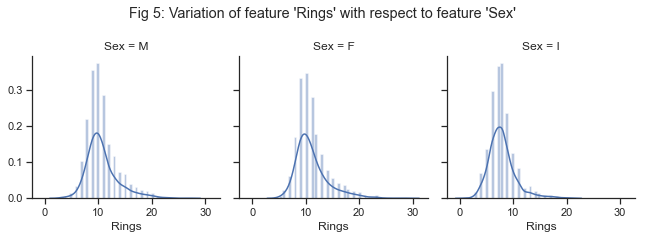

In [13]:
g = sns.FacetGrid(abalone, col="Sex")
g.map(sns.distplot, 'Rings',hist=True, kde=True)
plt.suptitle('Fig 5: Variation of feature \'Rings\' with respect to feature \'Sex\'',y=1.1)
g.add_legend();


#### Q1.6. Normalization: Assess the need for normalization and implement it.

#### (a) Is normalization necessary for this dataset given what you’ve seen? Explain why briefly.
Answer:

We see that the range of how the features are spread over is not the same and hence normalization is very much needed in order to make a fair comparison between them. This allows equal weightage to all the features without giving more preference to the ones with larger numerical values. We can see from the box plots 1(a) and 1(b), that the features have varying ranges. So, normalization is a good idea to obtain standard scaled values across our data.

#### (b) Using the min-max normalized data, pick two or three numeric features of your own choosing and compare the interaction between the variables and how it differes from the unnormalized data.
Answer:

In order to perform normalization, we first use the technique of one hot encoding [5] to convert the categorical data feature 'Sex' having values {M,F,I} to numeric features having either a 0 (if its not M or F or I) or 1 (if true for M or F or I). This method is useful in getting a clear view of our data and also include nominal variables in our analysis.

Also, we should keep in mind that in the next steps we are required to perform classification on 'Rings' and hence normalizing that feature would result in different classification. and hence we are dropping that column and storing it in another variable before normalizing our data.

In [14]:
one_hot_encoded_abalone = pd.get_dummies(abalone, columns = [s])
columns = one_hot_encoded_abalone.columns.values
features = np.delete(columns, 7)
class_column = ['Rings']

#min-max normalization
Scaler = preprocessing.MinMaxScaler()
Scaler.fit(one_hot_encoded_abalone[features])

abalone_scaled = Scaler.transform(one_hot_encoded_abalone[features])
abalone_scaled = pd.DataFrame(abalone_scaled, columns = [features])


print(abalone_scaled.describe())

            Length     Diameter       Height Whole weight Shucked weight Viscera weight Shell weight        Sex_F  \
count  4177.000000  4177.000000  4177.000000  4177.000000    4177.000000    4177.000000  4177.000000  4177.000000   
mean      0.606746     0.593078     0.123466     0.292808       0.241000       0.237121     0.236503     0.312904   
std       0.162288     0.166790     0.037015     0.173681       0.149269       0.144324     0.138717     0.463731   
min       0.000000     0.000000     0.000000     0.000000       0.000000       0.000000     0.000000     0.000000   
25%       0.506757     0.495798     0.101770     0.155658       0.124412       0.122449     0.128052     0.000000   
50%       0.635135     0.621849     0.123894     0.282451       0.225286       0.224490     0.231689     0.000000   
75%       0.729730     0.714286     0.146018     0.407650       0.336920       0.332456     0.326358     1.000000   
max       1.000000     1.000000     1.000000     1.000000       

Min-max normalization makes the data to fit in the range of 0 to 1 (min to max) [6].

            Length     Diameter       Height Whole weight Shucked weight Viscera weight Shell weight        Sex_F  \
count  4177.000000  4177.000000  4177.000000  4177.000000    4177.000000    4177.000000  4177.000000  4177.000000   
mean      0.606746     0.593078     0.123466     0.292808       0.241000       0.237121     0.236503     0.312904   
std       0.162288     0.166790     0.037015     0.173681       0.149269       0.144324     0.138717     0.463731   
min       0.000000     0.000000     0.000000     0.000000       0.000000       0.000000     0.000000     0.000000   
25%       0.506757     0.495798     0.101770     0.155658       0.124412       0.122449     0.128052     0.000000   
50%       0.635135     0.621849     0.123894     0.282451       0.225286       0.224490     0.231689     0.000000   
75%       0.729730     0.714286     0.146018     0.407650       0.336920       0.332456     0.326358     1.000000   
max       1.000000     1.000000     1.000000     1.000000       

Text(0.5, 0.98, 'Fig 6: scatter matrix of length and diameter after min-max normalization')

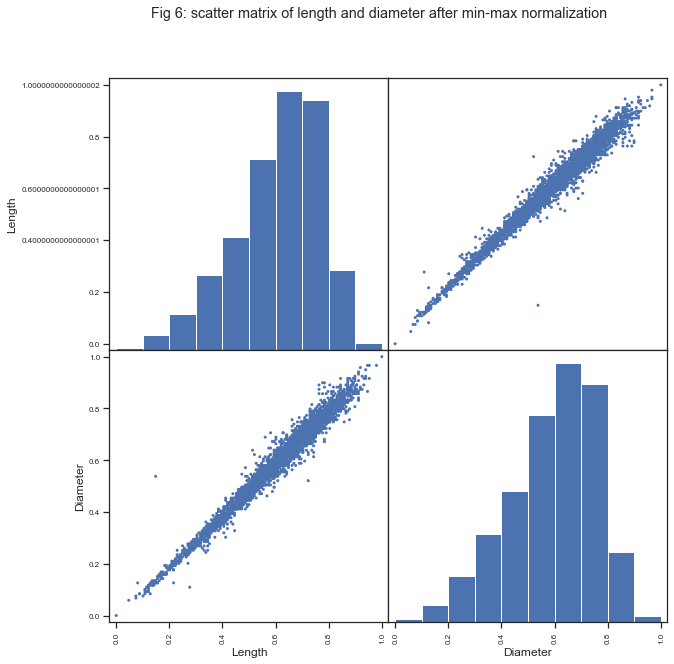

In [15]:
#Selecting two data features for out of our total features
#data_features = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

two_numeric_features = ['Length','Diameter']

Scaler = preprocessing.MinMaxScaler()
abalone_scaled_scatter = Scaler.fit(abalone[two_numeric_features])

print(abalone_scaled.describe()) #Used normalization method

abalone_scaled_scatter = Scaler.transform(abalone[two_numeric_features])
abalone_scaled_scatter = pd.DataFrame(abalone_scaled_scatter, columns = two_numeric_features)
plot2 = pd.plotting.scatter_matrix(abalone_scaled_scatter, alpha=1, figsize=(10,10))
plt.suptitle('Fig 6: scatter matrix of length and diameter after min-max normalization')

Comparing the scatter-matrix plot for diameter and length featres before nromalization in Fig-2 and after min-max normalization in Fig-6, we can see that the scale has been modified. However, min-max normalization does not deal with outliers as effectively as Z-score normalization.

We can further look at the differences by looking at the variation of the features 'Length' and 'Height' with respect to 'Diameter'.

Initially plotting the variation for unnormalized data as follows:

#### (c) Now perform the same analysis but for the data with z-score normalization.

In [16]:
#z-score normalization
Scaler = preprocessing.StandardScaler()
Scaler.fit(one_hot_encoded_abalone[features])

abalone_standardized = Scaler.transform(one_hot_encoded_abalone[features])
abalone_standardized = pd.DataFrame(abalone_standardized, columns = [features])

print(abalone_standardized.describe())

             Length      Diameter        Height  Whole weight Shucked weight Viscera weight  Shell weight  \
count  4.177000e+03  4.177000e+03  4.177000e+03  4.177000e+03   4.177000e+03   4.177000e+03  4.177000e+03   
mean  -6.651770e-16 -3.957146e-16  5.082520e-16  1.466122e-16  -4.582295e-17   1.085504e-16  3.648825e-16   
std    1.000120e+00  1.000120e+00  1.000120e+00  1.000120e+00   1.000120e+00   1.000120e+00  1.000120e+00   
min   -3.739154e+00 -3.556267e+00 -3.335953e+00 -1.686092e+00  -1.614731e+00  -1.643173e+00 -1.705134e+00   
25%   -6.161975e-01 -5.833158e-01 -5.862075e-01 -7.897577e-01  -7.811585e-01  -7.946415e-01 -7.819095e-01   
50%    1.749513e-01  1.725193e-01  1.156329e-02 -5.963767e-02  -1.052891e-01  -8.753202e-02 -3.470794e-02   
75%    7.579031e-01  7.267984e-01  6.093341e-01  6.613049e-01   6.426730e-01   6.606355e-01  6.478319e-01   
max    2.423480e+00  2.440025e+00  2.368329e+01  4.072271e+00   5.085388e+00   5.286500e+00  5.504642e+00   

              Sex_

From above values we can see that, z-score normalization has scaled all data to fit a normal distribution. We can see that all columns have a mean of 0 and a standard deviation of approximately 1. We see z scores are positive and negative, positive z score indicates its corresponding raw score is above the mean and negative z score indicates its corresponding raw score is below the mean.

StandardScaler()


Text(0.5, 0.98, 'Fig 7: scatter matrix of length and diameter after z-score normalization')

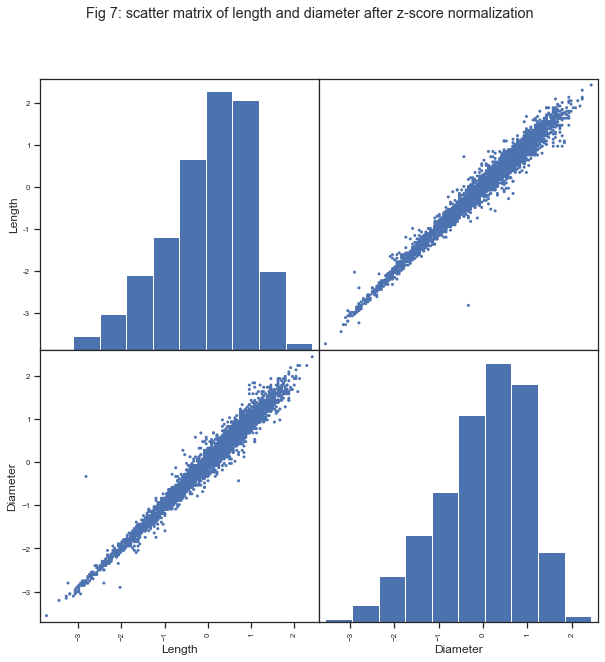

In [17]:
#Performing z-score normalization on length and diameter features
Scaler = preprocessing.StandardScaler()
abalone_standardized = Scaler.fit(abalone[two_numeric_features])

print(abalone_standardized) #Used normalization method

abalone_standardized = Scaler.transform(abalone[two_numeric_features])
abalone_standardized = pd.DataFrame(abalone_standardized, columns = two_numeric_features)

plot2 = pd.plotting.scatter_matrix(abalone_standardized, alpha=1, figsize=(10,10))
plt.suptitle('Fig 7: scatter matrix of length and diameter after z-score normalization')

Comparing the scatter-matrix plot for diameter and length featres before nromalization in Fig-2 and after Z-score standardization in Fig-7, we can see that the scale has been modified to have a mean of 0 and standard deviation of about 1 i.e the values are spread above and below 0-mean with almost equal distance of 1.



## Q2 Classification with KNN (on wine data set)

Loading the data set and performing basic exploratory data analysis. We have 13 features out of which, 'color' is nominal feature and the feature of interest 'quality' is ordinal feature. 

In [18]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide'
, 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]
#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [19]:
wine[D].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


By looking at the way the data is distributed, we can see that it is unbalanced as the number of samples are very less for red wine compared to white wine. In such case it would be best to normalize the data first before going for further analysis.

In [20]:
wine['color'].value_counts()

0.0    4898
1.0    1599
Name: color, dtype: int64

Text(0.5, 1.0, 'Fig 8: Sample distribution of red [1] and white [0] wine')

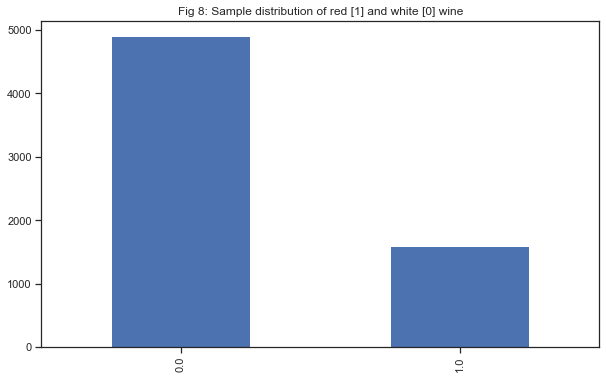

In [21]:
fig = plt.figure(figsize = (10,6))
wine['color'].value_counts().plot(kind='bar')
plt.title('Fig 8: Sample distribution of red [1] and white [0] wine')


#### Q2.1. Divide the data into a training set and a test set (80%, 20%).

The data is unbalanced as we discussed above hence we are performing normalization before classification. Here we choose Z-score normalization method only.

In [22]:
#Splitting the wine data into testing (20%) and training (80%) sets.
x_train,x_test,y_train,y_test = train_test_split(wine[DC], wine[L], random_state=27, test_size=0.2)

#standardization using z-score
Scaler = preprocessing.StandardScaler()
Scaler.fit(x_train)

x_train = Scaler.transform(x_train)
x_train = pd.DataFrame(x_train, columns = [DC])
x_test = Scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns = [DC])


#### Q2.2. Training the model with the classifier’s default parameters.

The K-Neighbors Classifier uses k=5 as default value. And we got an accuracy of about 56% for the default model.

In [23]:
#default classifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)
a_scores = (accuracy_score(y_predict, y_test)*100)

print("Accuracy for default parameters is: ", a_scores ,"%")

Accuracy for default parameters is:  56.230769230769226 %



#### Q2.3. “tune” the classifier using Cross Validation. Using these scores, plot a figure of accuracy vs k. Report the best k in terms of classification accuracy.

In order to find the best K-value we are performing cross validation [7]. Using this method we observe that for different values of K, the accuracy of our KNeighbors classification varies, and the K-value that gives maximum accuracy is the best value for our model.

In [24]:
k_values = [1,3,5,7,9,11,13,15]
validation_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    validation_accuracy.append((cv_score.mean())*100)

print("Cross validation accuracy for various k-values: ", validation_accuracy)

Cross validation accuracy for various k-values:  [60.78496335233583, 54.18501517731548, 54.762252905900645, 55.628007699711254, 55.53196490708521, 54.877859628340865, 54.89701636188643, 54.76227141482195]


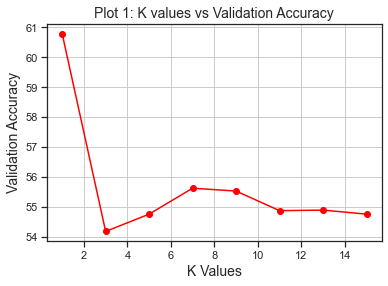

In [25]:
plt.plot(k_values,validation_accuracy, color='red',marker='o')
plt.xlabel('K Values',fontsize=14)
plt.ylabel('Validation Accuracy',fontsize=14)
plt.title('Plot 1: K values vs Validation Accuracy',fontsize=14)
plt.grid(True)
plt.show()

We see that the maximum accuracy 60.78% is obtained for K=1 and accuracy decreases as K-value is increased.


#### Q2.4. Improving on KNN: You can try to improve on your classification results using the method of weighted KNN. Compare the three different weighting schemes (default, manhatten, euclidean) by plotting accuracy vs k for all three of them on the same figure to see the effect.

KNN essesntially classifies the given data based on the distance between neighbors, there are a numbe of different distances that can be choosen to perform knn, out of which euclidean is the most common. 

In the following code we perform KNN for three different distance schemes, Manhattan, Euclidean and Default being minkowski respenctively to see how varying the distance schemes effects the KNN model. 

In [26]:
k_values = [1,3,5,7,9,11,15,17,19,21,25,27,31,35,39,45,49,51]
manhattan_accuracy = []
euclidean_accuracy = []
default_accuracy = []

for k in k_values:
    #manhattan
    classifier_k = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1, metric='minkowski')
    manhattan_accuracy.append(cross_val_score(classifier_k, x_train, y_train, cv=5, scoring='accuracy').mean()*100)

    #euclidean
    classifier_k = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2, metric='minkowski')
    euclidean_accuracy.append(cross_val_score(classifier_k, x_train, y_train, cv=5, scoring='accuracy').mean()*100)

    #default is minkowski (p=2 and weights='uniform')
    classifier_k = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='minkowski')
    default_accuracy.append(cross_val_score(classifier_k, x_train, y_train, cv=5, scoring='accuracy').mean()*100) 
    
print("Maximum Manhattan distance accuracy: ", max(manhattan_accuracy))
print("Maximum Euclidean distance accuracy: ", max(euclidean_accuracy))
print("Maximum Default distance accuracy: ", max(default_accuracy))

Maximum Manhattan distance accuracy:  65.9994632412823
Maximum Euclidean distance accuracy:  65.6913452284001
Maximum Default distance accuracy:  60.78496335233583


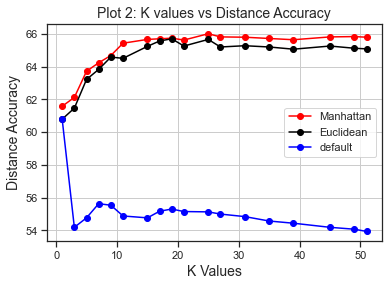

In [27]:
plt.plot(k_values,manhattan_accuracy, color='red',marker='o',label='Manhattan')
plt.plot(k_values,euclidean_accuracy, color='black',marker='o',label='Euclidean')
plt.plot(k_values,default_accuracy, color='blue',marker='o',label='default')

plt.xlabel('K Values',fontsize=14)
plt.ylabel('Distance Accuracy',fontsize=14)
plt.title('Plot 2: K values vs Distance Accuracy',fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

From above plot, we can say that Manhatan with Z-score normalization performs better with high accuracy of 66% at k=25 where as Euclidean has slightly less accuracy. In case of default uniform weighting as the k increases the accuracy goes on decreases with increasing error.


#### Q2.5. Ablation Study on Normalization: We can do a simple form of ablation here by removing normalization from our pipeline. And plot the three curves from the previous question on weighted KNN.

Here, we are simply performing the above steps for un-normalized data to calculate accuracy and compare the result with normalized data's accuracy.

In [28]:
x_train,x_test,y_train,y_test = train_test_split(wine[DC], wine[L], random_state=27, test_size=0.2)

In [29]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)
a_scores = (accuracy_score(y_predict, y_test)*100)

print("Accuracy for default parameters is: ", a_scores ,"%")

Accuracy for default parameters is:  47.53846153846154 %


For unnormalized data the default KNN accuracy is 47.5% which is less compared to the accuracy for normalized data i.e 56.23.

Now, let's see the difference for cross validation.

In [30]:
k_values = [1,3,5,7,9,11,13,15]
validation_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    validation_accuracy.append((cv_score.mean())*100)

print("Cross validation accuracy for various k-values: ", validation_accuracy)

Cross validation accuracy for various k-values:  [54.030743318279406, 46.14203746205671, 46.68036943806915, 46.60344636114607, 46.44978529651292, 46.06487376915673, 46.35350188790998, 46.199600207299916]


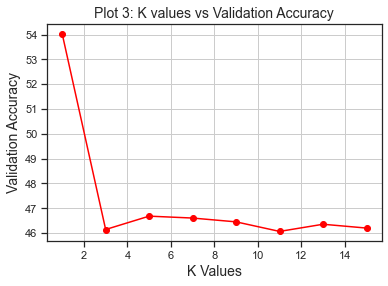

In [31]:
plt.plot(k_values,validation_accuracy, color='red',marker='o')
plt.xlabel('K Values',fontsize=14)
plt.ylabel('Validation Accuracy',fontsize=14)
plt.title('Plot 3: K values vs Validation Accuracy',fontsize=14)
plt.grid(True)
plt.show()

From cross validation results for various K-values, we got 54% accuracy for k=1 for unnormalized data, which is also less compared to z-score normalized data for which we had gotten 60.78% accuracy for k=1.

In [32]:
k_values = [1,3,5,7,9,11,15,17,19,21,25,27,31,35,39,45,49,51]
manhattan_accuracy = []
euclidean_accuracy = []
default_accuracy = []

for k in k_values:
    #manhattan
    classifier_k = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1, metric='minkowski')
    manhattan_accuracy.append(cross_val_score(classifier_k, x_train, y_train, cv=5, scoring='accuracy').mean()*100)

    #euclidean
    classifier_k = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2, metric='minkowski')
    euclidean_accuracy.append(cross_val_score(classifier_k, x_train, y_train, cv=5, scoring='accuracy').mean()*100)

    #default is minkowski (p=2 and weights='uniform')
    classifier_k = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='minkowski')
    default_accuracy.append(cross_val_score(classifier_k, x_train, y_train, cv=5, scoring='accuracy').mean()*100) 
    
print("Maximum Manhattan distance accuracy: ", max(manhattan_accuracy))
print("Maximum Euclidean distance accuracy: ", max(euclidean_accuracy))
print("Maximum Default distance accuracy: ", max(default_accuracy))

Maximum Manhattan distance accuracy:  59.72625305397201
Maximum Euclidean distance accuracy:  58.22554971496261
Maximum Default distance accuracy:  54.030743318279406


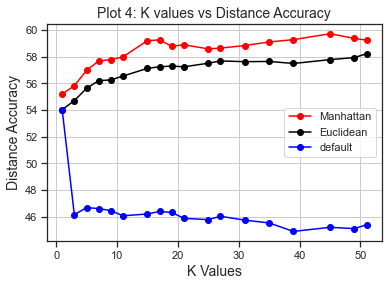

In [33]:
plt.plot(k_values,manhattan_accuracy, color='red',marker='o',label='Manhattan')
plt.plot(k_values,euclidean_accuracy, color='black',marker='o',label='Euclidean')
plt.plot(k_values,default_accuracy, color='blue',marker='o',label='default')

plt.xlabel('K Values',fontsize=14)
plt.ylabel('Distance Accuracy',fontsize=14)
plt.title('Plot 4: K values vs Distance Accuracy',fontsize=14)
plt.legend(loc='right')
plt.grid(True)
plt.show()

From above plot, we can say that Manhatan performs better with high accuracy of 59.72% at k=45 where as Euclidean has slightly less accuracy. In case of default uniform weighting as the k increases the accuracy goes on decreases with increasing error.

However, these accuracies are less than the ones we have obtained for normalized data.


## Q2 Classification with KNN (on Abalone Dataset)

We have already performed basic exploratory data analysis on abalone data set under Q1. Now performing KNN on z-score normalized data as follows;

In [34]:
columns = one_hot_encoded_abalone.columns.values
features = np.delete(columns, 7)
class_column = ['Rings']
features

array(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype=object)


#### Q2.1. Divide the data into a training set and a test set (80%, 20%).

In [35]:
#Splitting the abalone data into testing (20%) and training (80%) sets.
x_train,x_test,y_train,y_test = train_test_split(one_hot_encoded_abalone[features], one_hot_encoded_abalone[class_column], random_state=27, test_size=0.2)

#Z-score normalization 
Scaler = preprocessing.StandardScaler()
Scaler.fit(x_train)

x_train = Scaler.transform(x_train)
x_train = pd.DataFrame(x_train, columns = [features])
x_test = Scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns = [features])


#### Q2.2. Training the model with the classifier’s default parameters.

The K-Neighbors Classifier uses k=5 as default value. Accuracy obtained is about 21.8% for default KNN.

In [36]:
#default classifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)
a_scores = (accuracy_score(y_predict, y_test)*100)

print("Accuracy for default parameters is: ", a_scores ,"%")

Accuracy for default parameters is:  21.88995215311005 %



#### Q2.3. “tune” the classifier using Cross Validation. Using these scores, plot a figure of accuracy vs k. Report the best k in terms of classification accuracy.

In [37]:
k_values = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61]
validation_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    validation_accuracy.append((cv_score.mean())*100)
    
print("Cross Validation accucary for abalone:", max(validation_accuracy))
    

Cross Validation accucary for abalone: 27.177707365537984


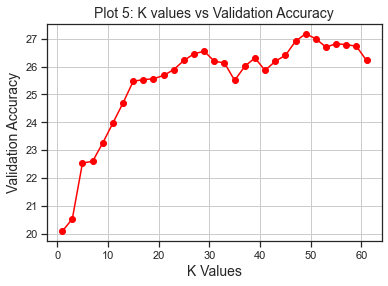

In [38]:
plt.plot(k_values,validation_accuracy, color='red',marker='o')
plt.xlabel('K Values',fontsize=14)
plt.ylabel('Validation Accuracy',fontsize=14)
plt.title('Plot 5: K values vs Validation Accuracy',fontsize=14)
plt.grid(True)
plt.show()

After performing cross-validation for various k values we got the maximum accuracy of 27.6% for k=49.


#### Q2.4. Improving on KNN: You can try to improve on your classification results using the method of weighted KNN. Compare the three different weighting schemes (default, manhatten, euclidean) by plotting accuracy vs k for all three of them on the same figure to see the effect.

In [39]:
k_values = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45]
manhattan_accuracy = []
euclidean_accuracy = []
default_accuracy = []

for k in k_values:
    #manhattan
    classifier_k = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1, metric='minkowski')
    manhattan_accuracy.append(cross_val_score(classifier_k, x_train, y_train, cv=5, scoring='accuracy').mean()*100)

    #euclidean
    classifier_k = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2, metric='minkowski')
    euclidean_accuracy.append(cross_val_score(classifier_k, x_train, y_train, cv=5, scoring='accuracy').mean()*100)

    #default is minkowski (p=2 and weights='uniform')
    classifier_k = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='minkowski')
    default_accuracy.append(cross_val_score(classifier_k, x_train, y_train, cv=5, scoring='accuracy').mean()*100) 
    
print("Maximum Manhattan distance accuracy: ", max(manhattan_accuracy))
print("Maximum Euclidean distance accuracy: ", max(euclidean_accuracy))
print("Maximum Default distance accuracy: ", max(default_accuracy))

Maximum Manhattan distance accuracy:  26.908380548320398
Maximum Euclidean distance accuracy:  26.57894972387065
Maximum Default distance accuracy:  26.549725660786045


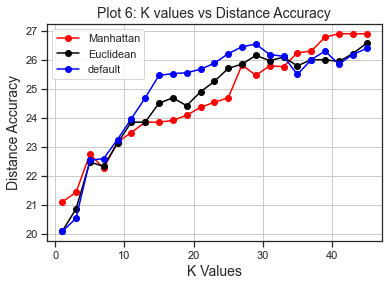

In [40]:
plt.plot(k_values,manhattan_accuracy, color='red',marker='o',label='Manhattan')
plt.plot(k_values,euclidean_accuracy, color='black',marker='o',label='Euclidean')
plt.plot(k_values,default_accuracy, color='blue',marker='o',label='default')

plt.xlabel('K Values',fontsize=14)
plt.ylabel('Distance Accuracy',fontsize=14)
plt.title('Plot 6: K values vs Distance Accuracy',fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

From above plot, we can say that Manhattan distance performs best with high accuracy of 26.9% at k=41 where as Euclidean and default has slightly less accuracy. However, they are all increasing with higher k-values.


#### Q2.5. Ablation Study on Normalization: We can do a simple form of ablation here by removing normalization from our pipeline. And plot the three curves from the previous question on weighted KNN.

Now performing KNN for un-normalized data. We can see that default KNN has an accuracy of 20.69% which is slightly less than that obtained for normalized data.

In [41]:
#splitting the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(one_hot_encoded_abalone[features], one_hot_encoded_abalone[class_column], random_state=27, test_size=0.2)

#default classifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)
a_scores = (accuracy_score(y_predict, y_test)*100)

print("Accuracy for default parameters is: ", a_scores ,"%")

Accuracy for default parameters is:  20.69377990430622 %


In [42]:
#Performing cross-validation
k_values = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61]
validation_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    validation_accuracy.append((cv_score.mean())*100)
    
print("Maximum Cross Validation accucary for abalone:",max(validation_accuracy))
    

Maximum Cross Validation accucary for abalone: 27.626272119438255


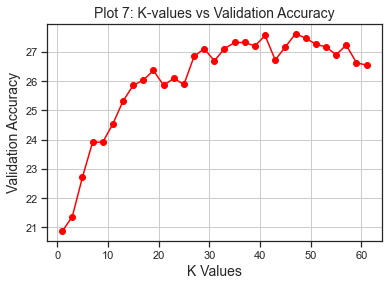

In [43]:
plt.plot(k_values,validation_accuracy, color='red',marker='o')
plt.xlabel('K Values',fontsize=14)
plt.ylabel('Validation Accuracy',fontsize=14)
plt.title('Plot 7: K-values vs Validation Accuracy',fontsize=14)
plt.grid(True)
plt.show()

Maximun accuracy of 27.62% is obtained for k=47. which is similar in comparison with normalized data.

In [44]:
#performing weighted knn for different k-values
k_values = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45]
manhattan_accuracy = []
euclidean_accuracy = []
default_accuracy = []

for k in k_values:
    #manhattan
    classifier_k = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1, metric='minkowski')
    manhattan_accuracy.append(cross_val_score(classifier_k, x_train, y_train, cv=5, scoring='accuracy').mean()*100)

    #euclidean
    classifier_k = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2, metric='minkowski')
    euclidean_accuracy.append(cross_val_score(classifier_k, x_train, y_train, cv=5, scoring='accuracy').mean()*100)

    #default is minkowski (p=2 and weights='uniform')
    classifier_k = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='minkowski')
    default_accuracy.append(cross_val_score(classifier_k, x_train, y_train, cv=5, scoring='accuracy').mean()*100) 
    
print("Maximum Manhattan distance accuracy: ", max(manhattan_accuracy))
print("Maximum Euclidean distance accuracy: ", max(euclidean_accuracy))
print("Maximum Default distance accuracy: ", max(default_accuracy))

Maximum Manhattan distance accuracy:  26.878171907306463
Maximum Euclidean distance accuracy:  27.17734933720004
Maximum Default distance accuracy:  27.566391879917298


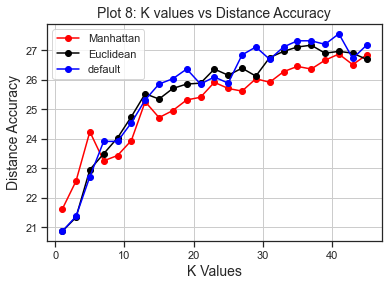

In [45]:
plt.plot(k_values,manhattan_accuracy, color='red',marker='o',label='Manhattan')
plt.plot(k_values,euclidean_accuracy, color='black',marker='o',label='Euclidean')
plt.plot(k_values,default_accuracy, color='blue',marker='o',label='default')

plt.xlabel('K Values',fontsize=14)
plt.ylabel('Distance Accuracy',fontsize=14)
plt.title('Plot 8: K values vs Distance Accuracy',fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

From above plot, we can see that Default distance performs best with high accuracy of 27.5% at k=41 where as Euclidean has slightly less accuracy. Manhattan has the lowest accuracy out of the three distances. However, they are all increasing with higher k-values.

The major difference for normalized and unnormalized data is seen here as the Weighten KNN values are higher for unnormalized data. Further, default distance scheme has provided higher result in case of unnormalized data.


## References:

[1] https://archive-beta.ics.uci.edu/ml/datasets/abalone

[2] https://pandas.pydata.org/docs/user_guide/10min.html

[3] https://chartio.com/learn/charts/what-is-a-scatter-plot/#:~:text=Scatter%20plots'%20primary%20uses%20are,relationships%20between%20two%20numeric%20variables.&text=Scatter%20plots%20can%20also%20show,the%20development%20of%20user%20personas.

[4] https://en.wikipedia.org/wiki/Box_plot

[5] https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

[6] https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

[7] https://scikit-learn.org/stable/modules/cross_validation.html